In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [51]:
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans",  "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=columns)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"] = (df["class"] == "g").astype(int)  # g = 1; h = 0

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Train, validation, test datasets

In [9]:
train, valid, test = np.split(
    df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))]
)

In [10]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # se quiser usar oversample, continua pegando dados da classe que possui menos em X para deixar mais semelhantes as quantidades
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))  # transformando y em 2D (-1 = len(y)) 
    
    return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1306
           1       0.84      0.89      0.87      2498

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes
P(Ck | x) = (P(x|Ck) . P(Ck)) / P(x)<br>
<ul>
    <li>P(Ck|x) = posterior</li>
    <li>x = feature vector</li>
    <li>P(x|Ck) = likelihood</li>
    <li>P(Ck) = prior</li>
    <li>P(x) = evidence</li>
</ul>

In [16]:

from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1306
           1       0.75      0.89      0.81      2498

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic Regression
Sigmoid

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1306
           1       0.87      0.83      0.85      2498

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.78      3804
weighted avg       0.81      0.80      0.80      3804



## SVM (Support Vector Machine)

In [22]:
from sklearn.svm import SVC  # support vector classifier 

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1306
           1       0.89      0.90      0.90      2498

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Networks
Input x weight (for all inputs) and summed -> +bias -> activation function -> output (or neuron)<br>
Activation Functions (makes the output of neurons not just a linear combination):
<ul>
    <li>Sigmoid (0:1)</li>
    <li>Tanh (-1:-1)</li>
    <li>RELU (0:+infinite)</li>
</ul>
<li> Backpropagation
<br>
Tensorflow (library)

In [25]:
import tensorflow as tf

In [36]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)
    
    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    
    plt.show()
    

In [37]:
def train_model(
    X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs
):
    nn_model = tf.keras.Sequential(
        (
            tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation="relu"),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation="sigmoid"),  # 0 ou 1
        )
    )

    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    history = nn_model.fit(  # poderia colocar o dataset de validação direto e não splitar o de treino
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


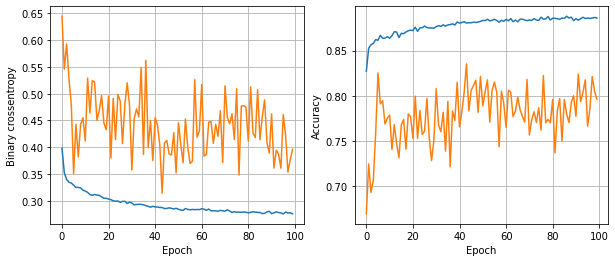

119/119 [==============================] - 0s 1000us/step - loss: 0.3056 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.01, batch_size 64


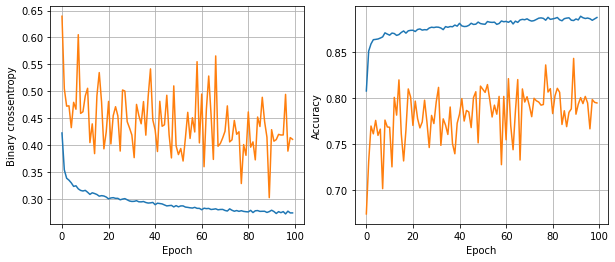

119/119 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8783
16 nodes, dropout 0, lr 0.01, batch_size 128


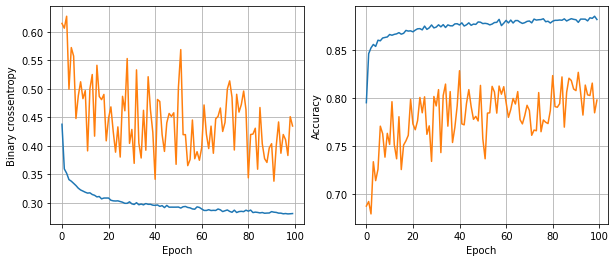

119/119 [==============================] - 0s 949us/step - loss: 0.3087 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch_size 32


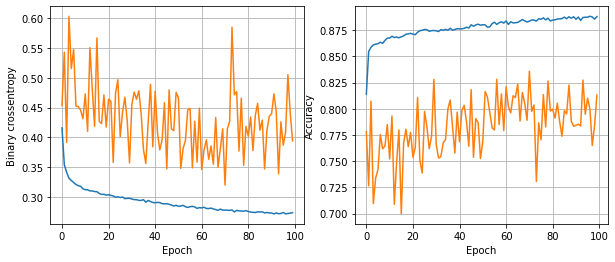

119/119 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.005, batch_size 64


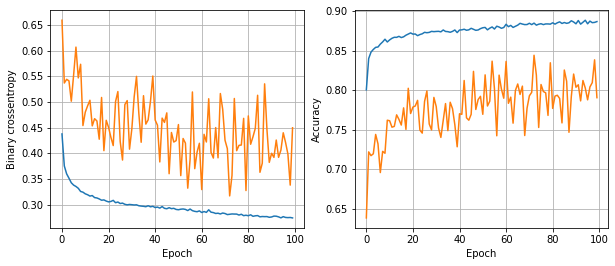

119/119 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.005, batch_size 128


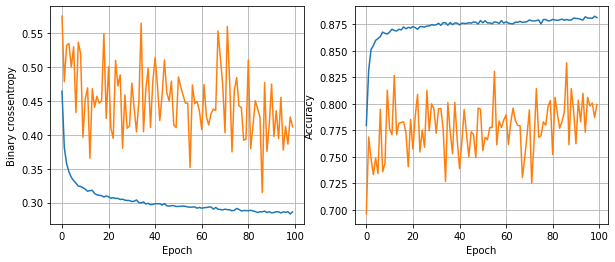

119/119 [==============================] - 0s 999us/step - loss: 0.3108 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.001, batch_size 32


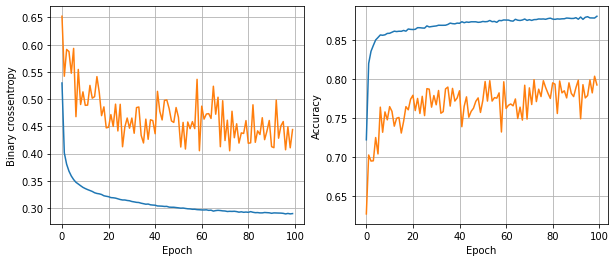

119/119 [==============================] - 0s 941us/step - loss: 0.3045 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch_size 64


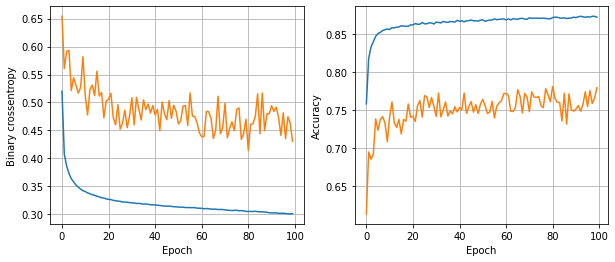

119/119 [==============================] - 0s 983us/step - loss: 0.3093 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.001, batch_size 128


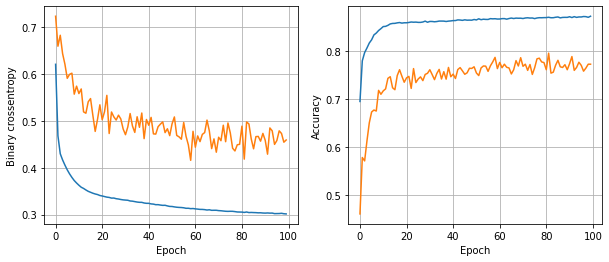

119/119 [==============================] - 0s 966us/step - loss: 0.3081 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.01, batch_size 32


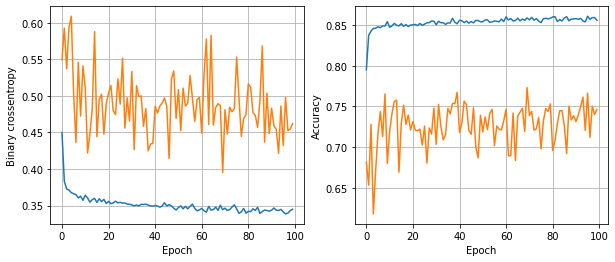

119/119 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.01, batch_size 64


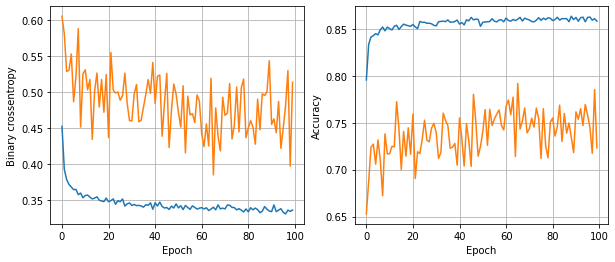

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8672
16 nodes, dropout 0.2, lr 0.01, batch_size 128


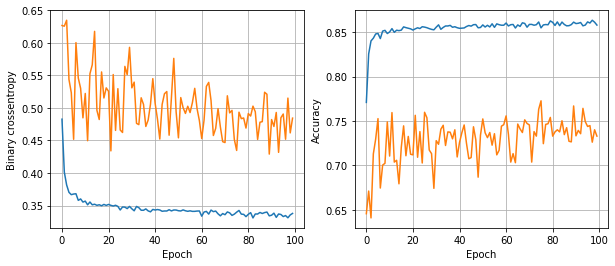

119/119 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.005, batch_size 32


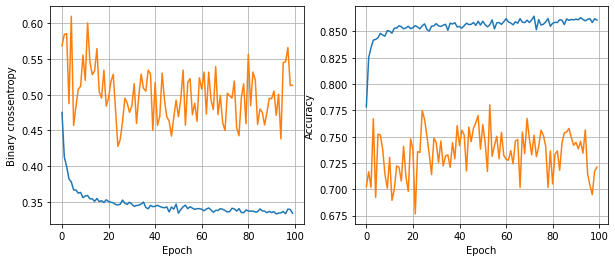

119/119 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8696
16 nodes, dropout 0.2, lr 0.005, batch_size 64


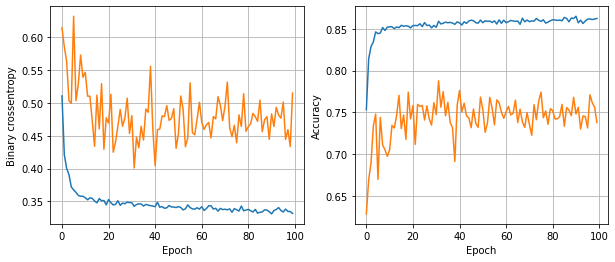

119/119 [==============================] - 0s 994us/step - loss: 0.3088 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.005, batch_size 128


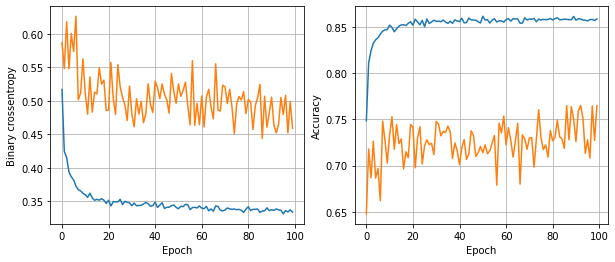

119/119 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8722
16 nodes, dropout 0.2, lr 0.001, batch_size 32


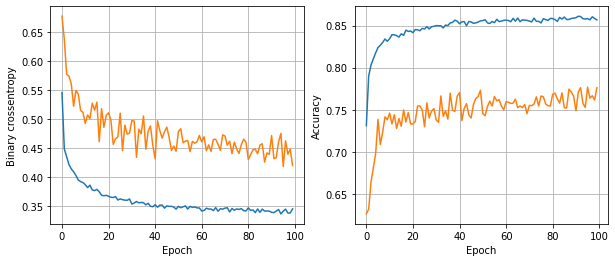

119/119 [==============================] - 0s 949us/step - loss: 0.3172 - accuracy: 0.8696
16 nodes, dropout 0.2, lr 0.001, batch_size 64


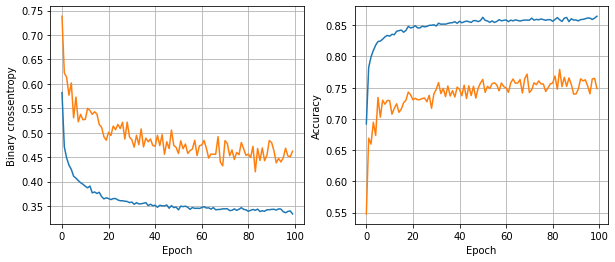

119/119 [==============================] - 0s 958us/step - loss: 0.3150 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.001, batch_size 128


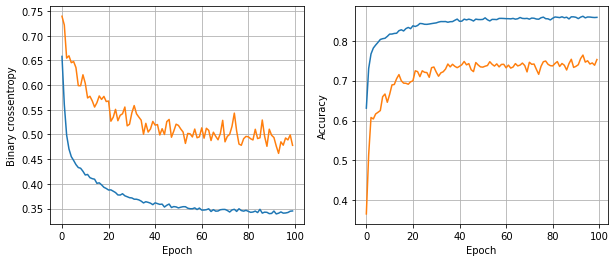

119/119 [==============================] - 0s 992us/step - loss: 0.3174 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.01, batch_size 32


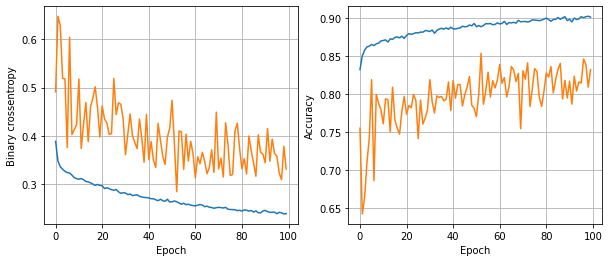

119/119 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.01, batch_size 64


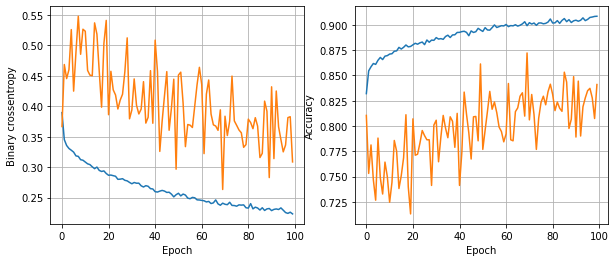

119/119 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.01, batch_size 128


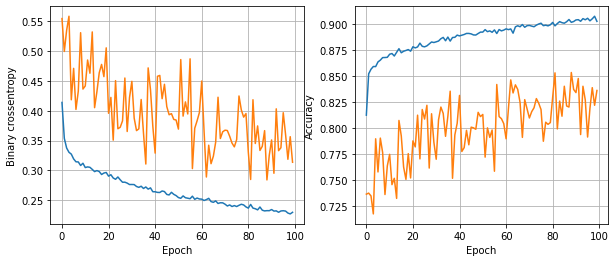

119/119 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.005, batch_size 32


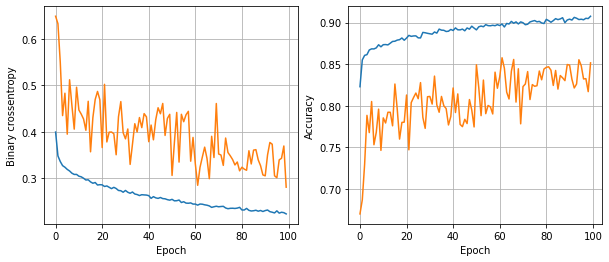

119/119 [==============================] - 0s 958us/step - loss: 0.3779 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.005, batch_size 64


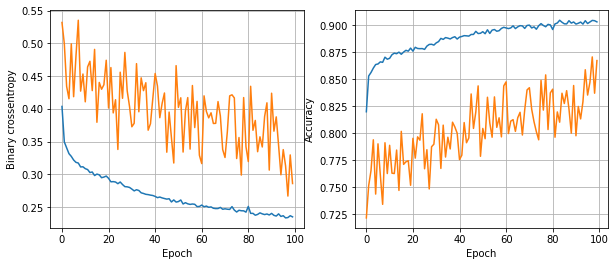

119/119 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.005, batch_size 128


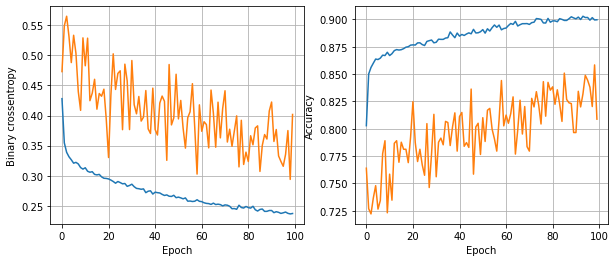

119/119 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.001, batch_size 32


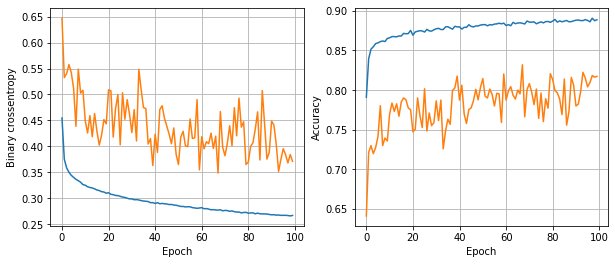

119/119 [==============================] - 0s 941us/step - loss: 0.3088 - accuracy: 0.8770
32 nodes, dropout 0, lr 0.001, batch_size 64


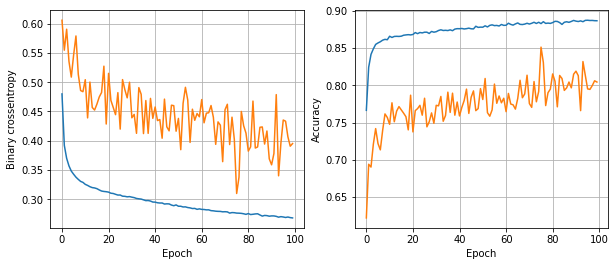

119/119 [==============================] - 0s 983us/step - loss: 0.3054 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.001, batch_size 128


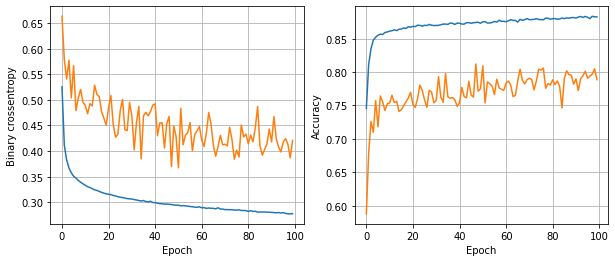

119/119 [==============================] - 0s 1000us/step - loss: 0.2985 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.01, batch_size 32


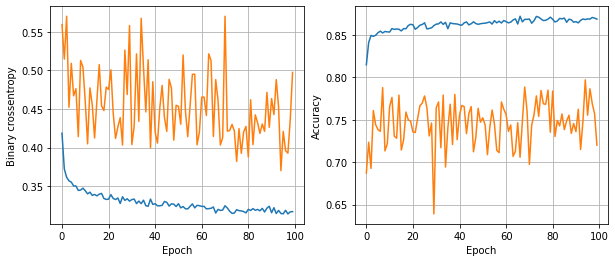

119/119 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.01, batch_size 64


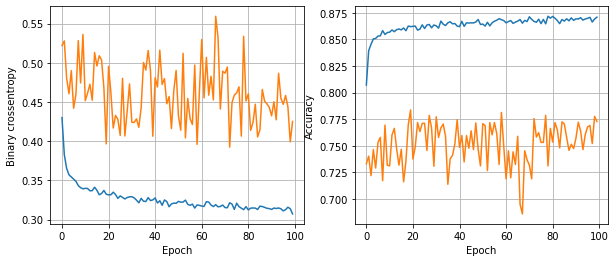

119/119 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch_size 128


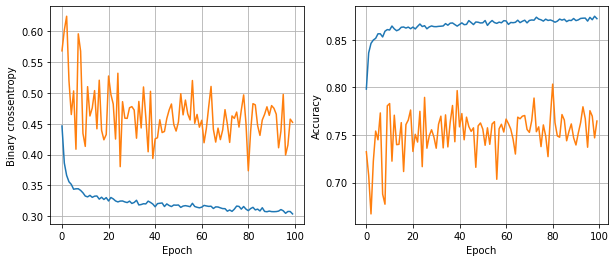

119/119 [==============================] - 0s 958us/step - loss: 0.2971 - accuracy: 0.8804
32 nodes, dropout 0.2, lr 0.005, batch_size 32


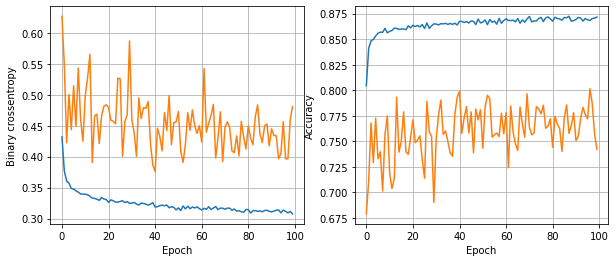

119/119 [==============================] - 0s 949us/step - loss: 0.3035 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.005, batch_size 64


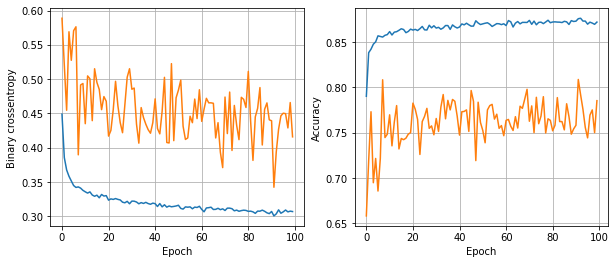

119/119 [==============================] - 0s 991us/step - loss: 0.3069 - accuracy: 0.8759
32 nodes, dropout 0.2, lr 0.005, batch_size 128


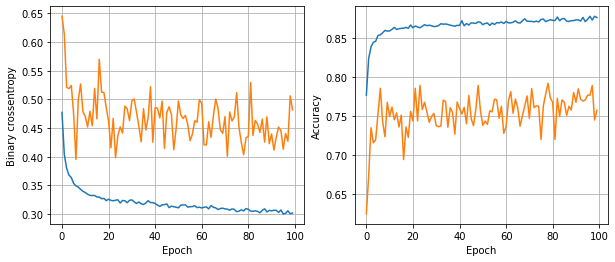

119/119 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.001, batch_size 32


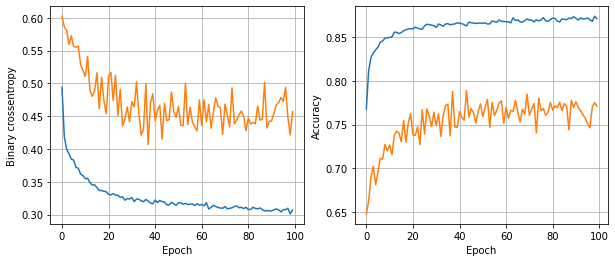

119/119 [==============================] - 0s 992us/step - loss: 0.3004 - accuracy: 0.8801
32 nodes, dropout 0.2, lr 0.001, batch_size 64


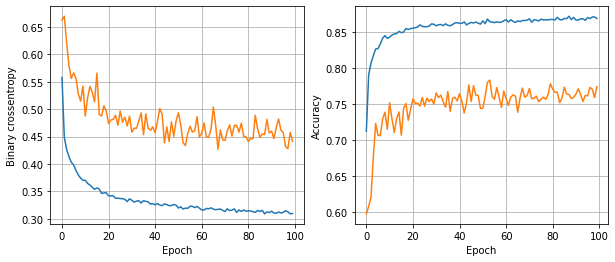

119/119 [==============================] - 0s 949us/step - loss: 0.2971 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.001, batch_size 128


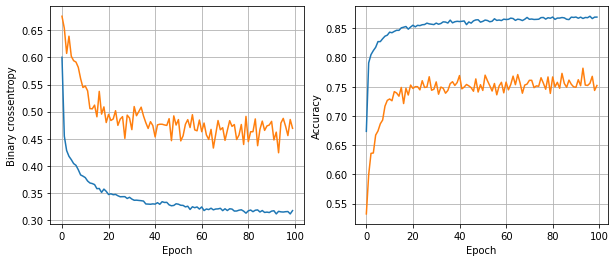

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8759
64 nodes, dropout 0, lr 0.01, batch_size 32


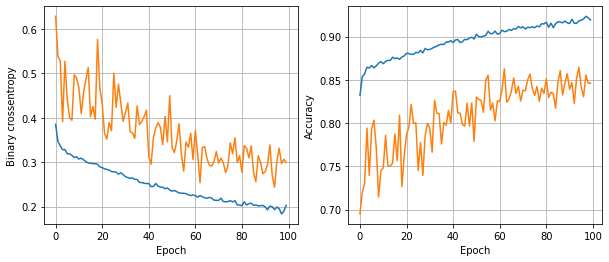

119/119 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8762
64 nodes, dropout 0, lr 0.01, batch_size 64


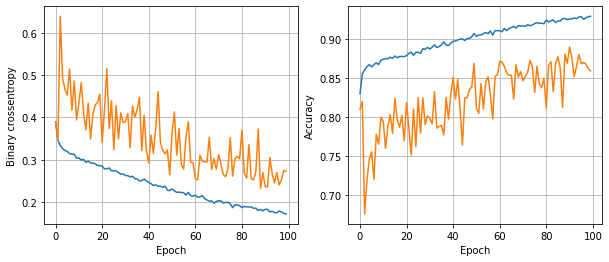

119/119 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.8630
64 nodes, dropout 0, lr 0.01, batch_size 128


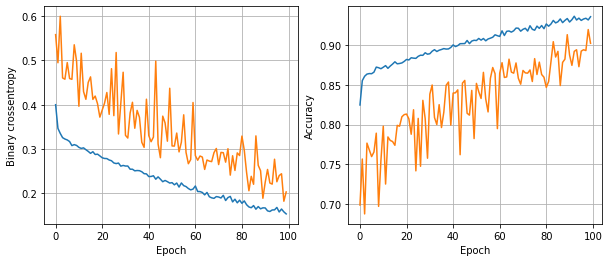

119/119 [==============================] - 0s 958us/step - loss: 0.5170 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch_size 32


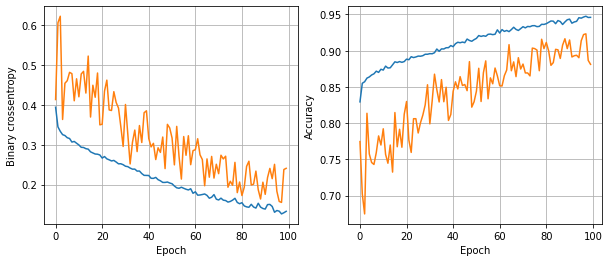

119/119 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.005, batch_size 64


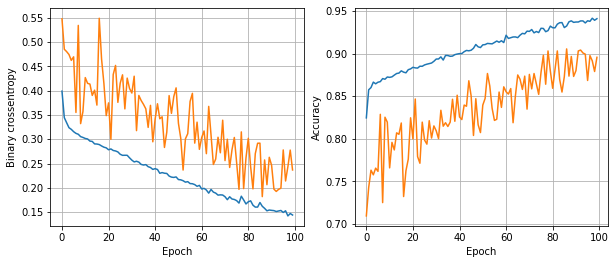

119/119 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.005, batch_size 128


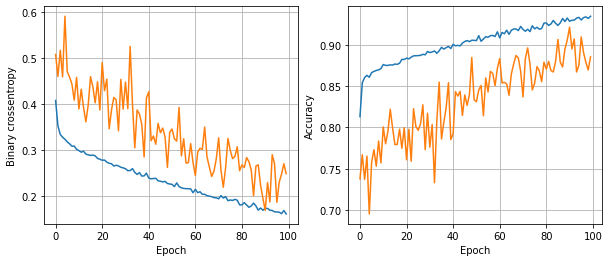

119/119 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.001, batch_size 32


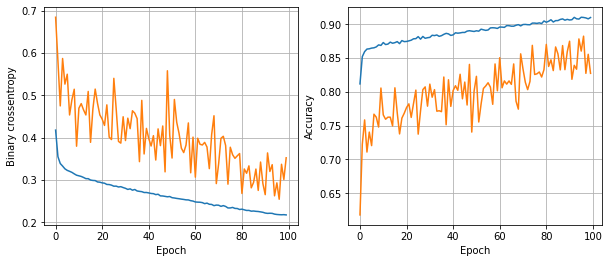

119/119 [==============================] - 0s 975us/step - loss: 0.3348 - accuracy: 0.8712
64 nodes, dropout 0, lr 0.001, batch_size 64


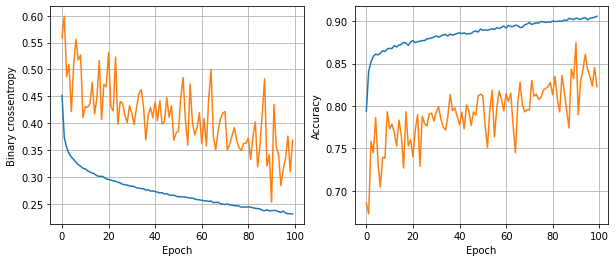

119/119 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8743
64 nodes, dropout 0, lr 0.001, batch_size 128


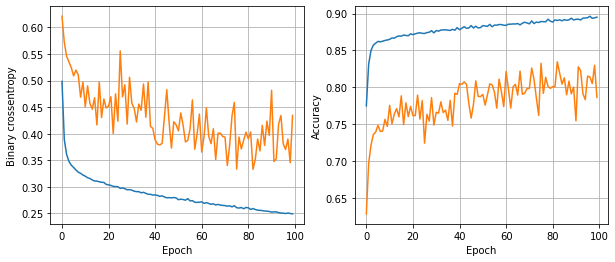

119/119 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.01, batch_size 32


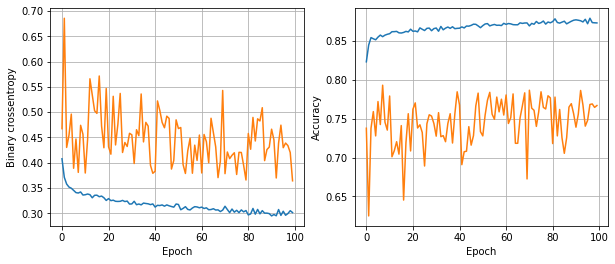

119/119 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.01, batch_size 64


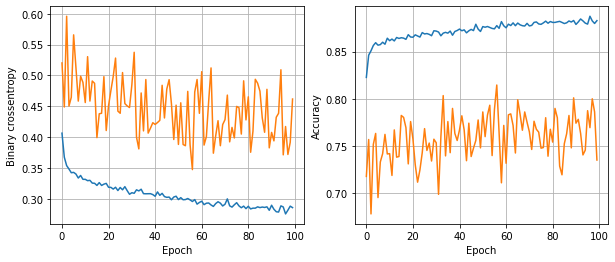

119/119 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch_size 128


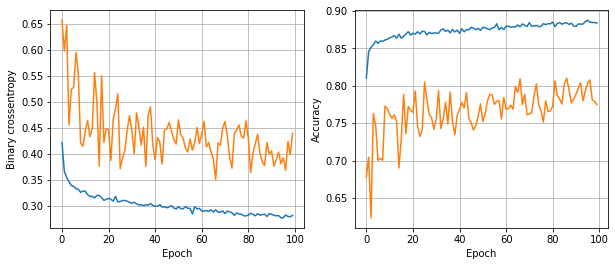

119/119 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8807
64 nodes, dropout 0.2, lr 0.005, batch_size 32


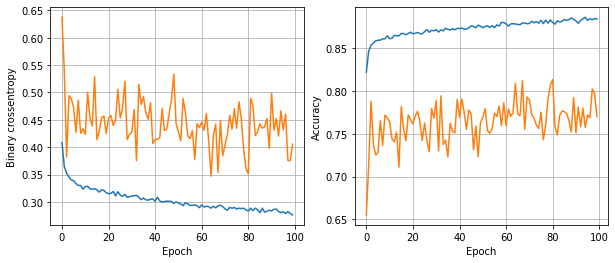

119/119 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.005, batch_size 64


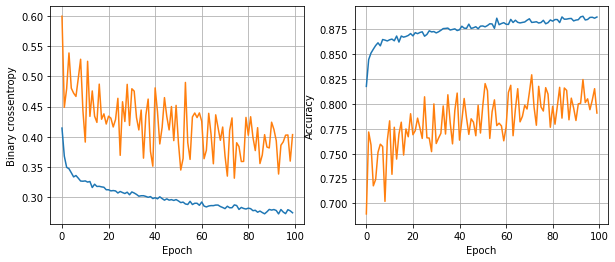

119/119 [==============================] - 0s 949us/step - loss: 0.2987 - accuracy: 0.8783
64 nodes, dropout 0.2, lr 0.005, batch_size 128


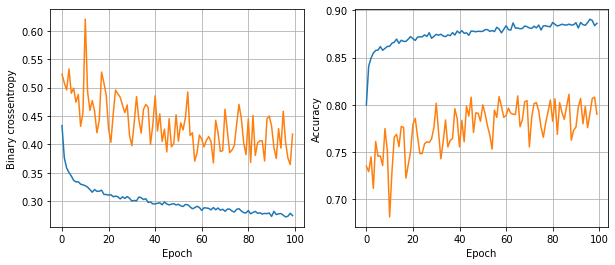

119/119 [==============================] - 0s 975us/step - loss: 0.2903 - accuracy: 0.8822
64 nodes, dropout 0.2, lr 0.001, batch_size 32


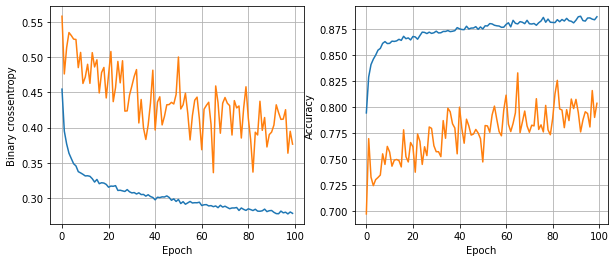

119/119 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.001, batch_size 64


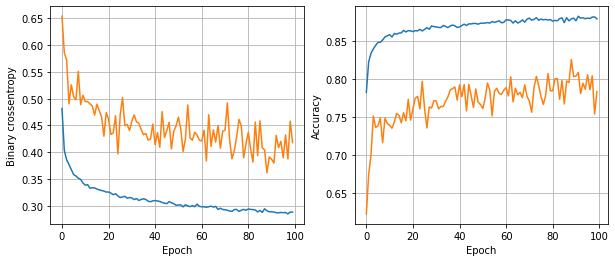

119/119 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8817
64 nodes, dropout 0.2, lr 0.001, batch_size 128


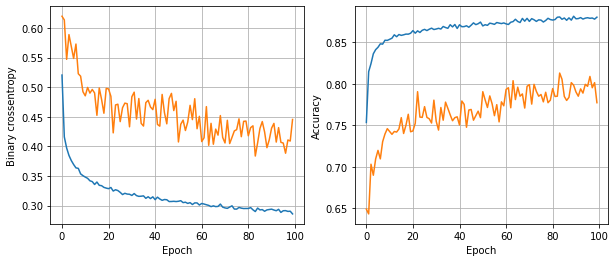

119/119 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8828


In [43]:
least_val_loss = float("inf")
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {learning_rate}, batch_size {batch_size}")
                model, history = train_model(
                    X_train,
                    y_train,
                    num_nodes,
                    dropout_prob,
                    learning_rate,
                    batch_size,
                    epochs,
                )
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_modell = model


In [48]:
y_pred = least_loss_modell.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )



119/119 [==============================] - 0s 966us/step


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1306
           1       0.88      0.94      0.91      2498

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.86      3804
weighted avg       0.87      0.87      0.87      3804

